# Different classification models

In [20]:
# !pip install opendatasets

  Using cached opendatasets-0.1.22-py3-none-any.whl (15 kB)
  Using cached kaggle-1.5.13.tar.gz (63 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77716 sha256=ebd00d1b577138ff39f04029fcdc5b59f86ac738c49461592a00c6f2c66c9dee
  Stored in directory: /Users/harikrishnadev/Library/Caches/pip/wheels/1b/22/79/e73b3e988388377c1cda3385bfa20c1799be101c2e12bbe3dc
Successfully built kaggle


In [19]:
# !pip install requests
# !pip install tabulate
# !pip install future
# !pip install matplotlib

In [90]:
# !pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [18]:
# !pip install h2o

  Using cached h2o-3.40.0.3.tar.gz (177.6 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694714 sha256=674d7cf98e265bf361accf8e42be24785895f54079994d048b739d3800fca31d
  Stored in directory: /Users/harikrishnadev/Library/Caches/pip/wheels/1c/97/ce/089265995983e65c6d259302b8e7524fec532ff381f527d6ab
Successfully built h2o


In [21]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction")

Skipping, found downloaded files in "./heart-failure-prediction" (use force=True to force download)


In [93]:
!ls

Group_project_HXD220000_MXB220061_KXV220007_MXS220057.Rmd
Group_project_HXD220000_MXB220061_KXV220007_MXS220057.html
HeartDiseaseGroupProject.ipynb
Project Outline.pdf
Research question.docx
ggpairs_data.png
ggpairs_hd_data.png
heart-failure-prediction
heart.csv


In [22]:
import h2o
h2o.init()

h2o:1: DeprecationWarning: Your Python version is 3.10.9. The support for this version will be removed in H2O 3.42.0.1.


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_361"; Java(TM) SE Runtime Environment (build 1.8.0_361-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from /opt/homebrew/anaconda3/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/tmp4hdazbwq
  JVM stdout: /var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/tmp4hdazbwq/h2o_harikrishnadev_started_from_python.out
  JVM stderr: /var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/tmp4hdazbwq/h2o_harikrishnadev_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_harikrishnadev_e2p6s9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.542 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [43]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [45]:
#cp - chest_pain_type
df.loc[df['ChestPainType'] == 0, 'ChestPainType'] = 'asymptomatic'
df.loc[df['ChestPainType'] == 1, 'ChestPainType'] = 'atypical angina'
df.loc[df['ChestPainType'] == 2, 'ChestPainType'] = 'non-anginal pain'
df.loc[df['ChestPainType'] == 3, 'ChestPainType'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['RestingECG'] == 0, 'RestingECG'] = 'left ventricular hypertrophy'
df.loc[df['RestingECG'] == 1, 'RestingECG'] = 'normal'
df.loc[df['RestingECG'] == 2, 'RestingECG'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['ST_Slope'] == 0, 'ST_Slope'] = 'downsloping'
df.loc[df['ST_Slope'] == 1, 'ST_Slope'] = 'flat'
df.loc[df['ST_Slope'] == 2, 'ST_Slope'] = 'upsloping'


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


<Axes: >

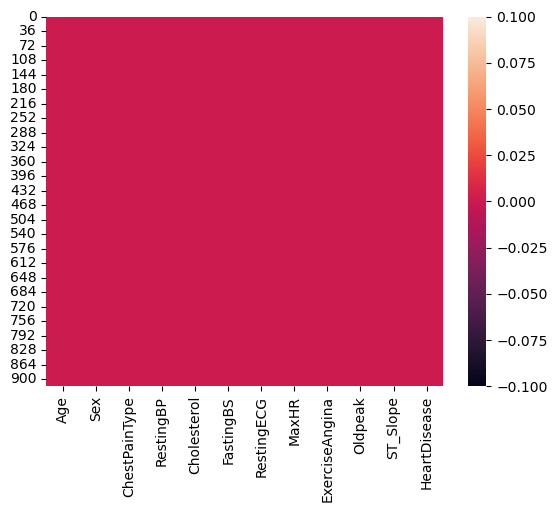

In [47]:
sns.heatmap(df.isnull())

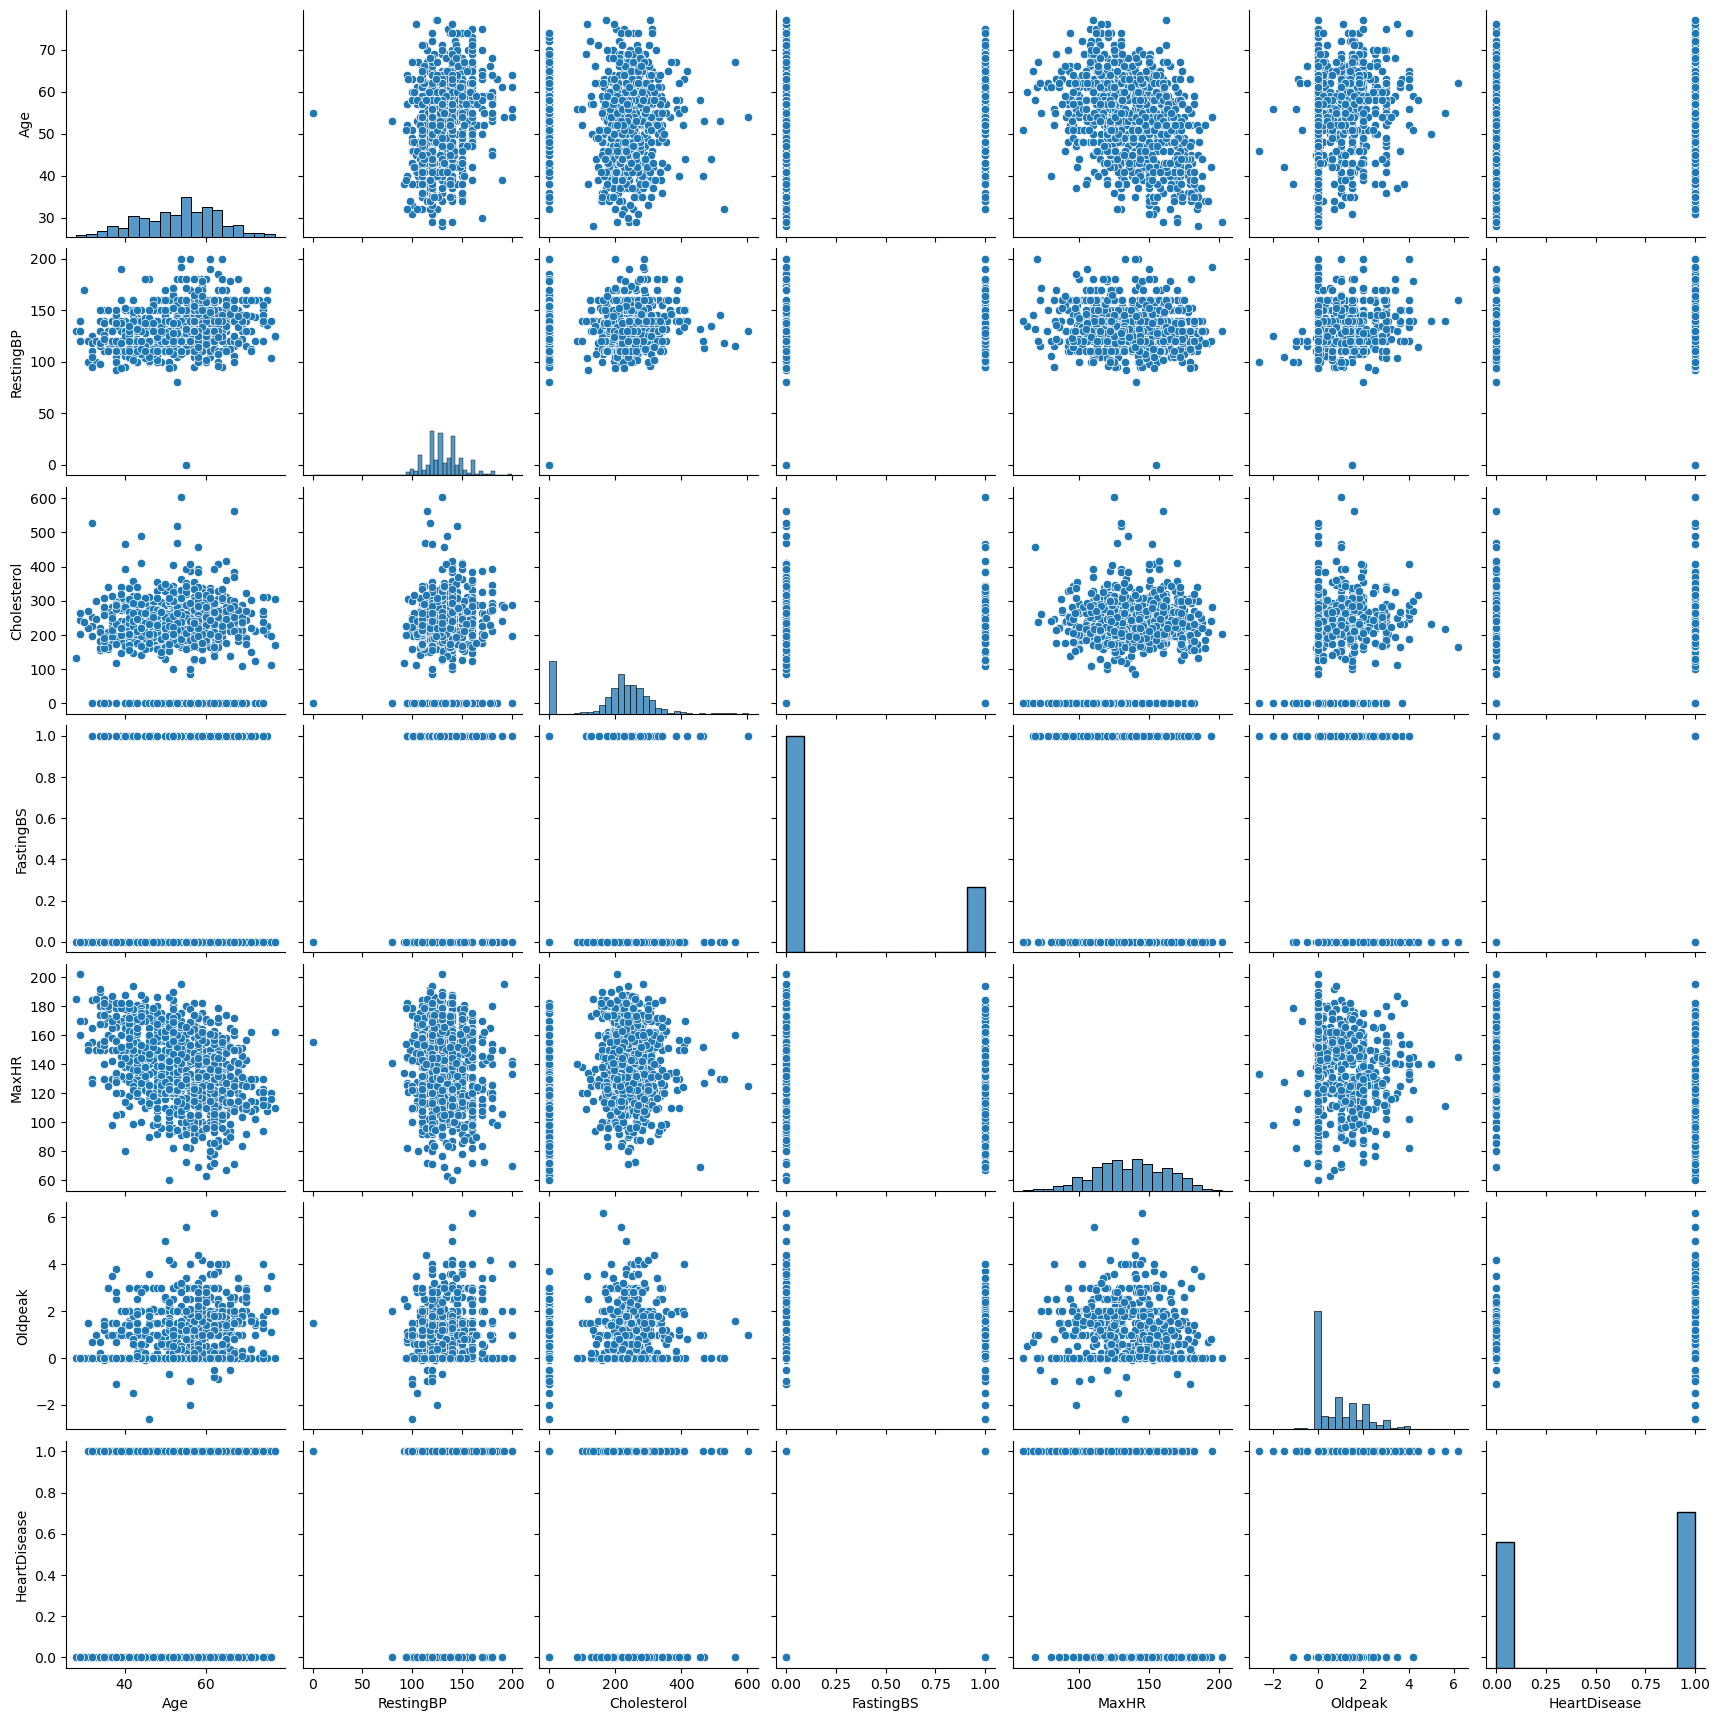

In [99]:
# sns.pairplot(df)

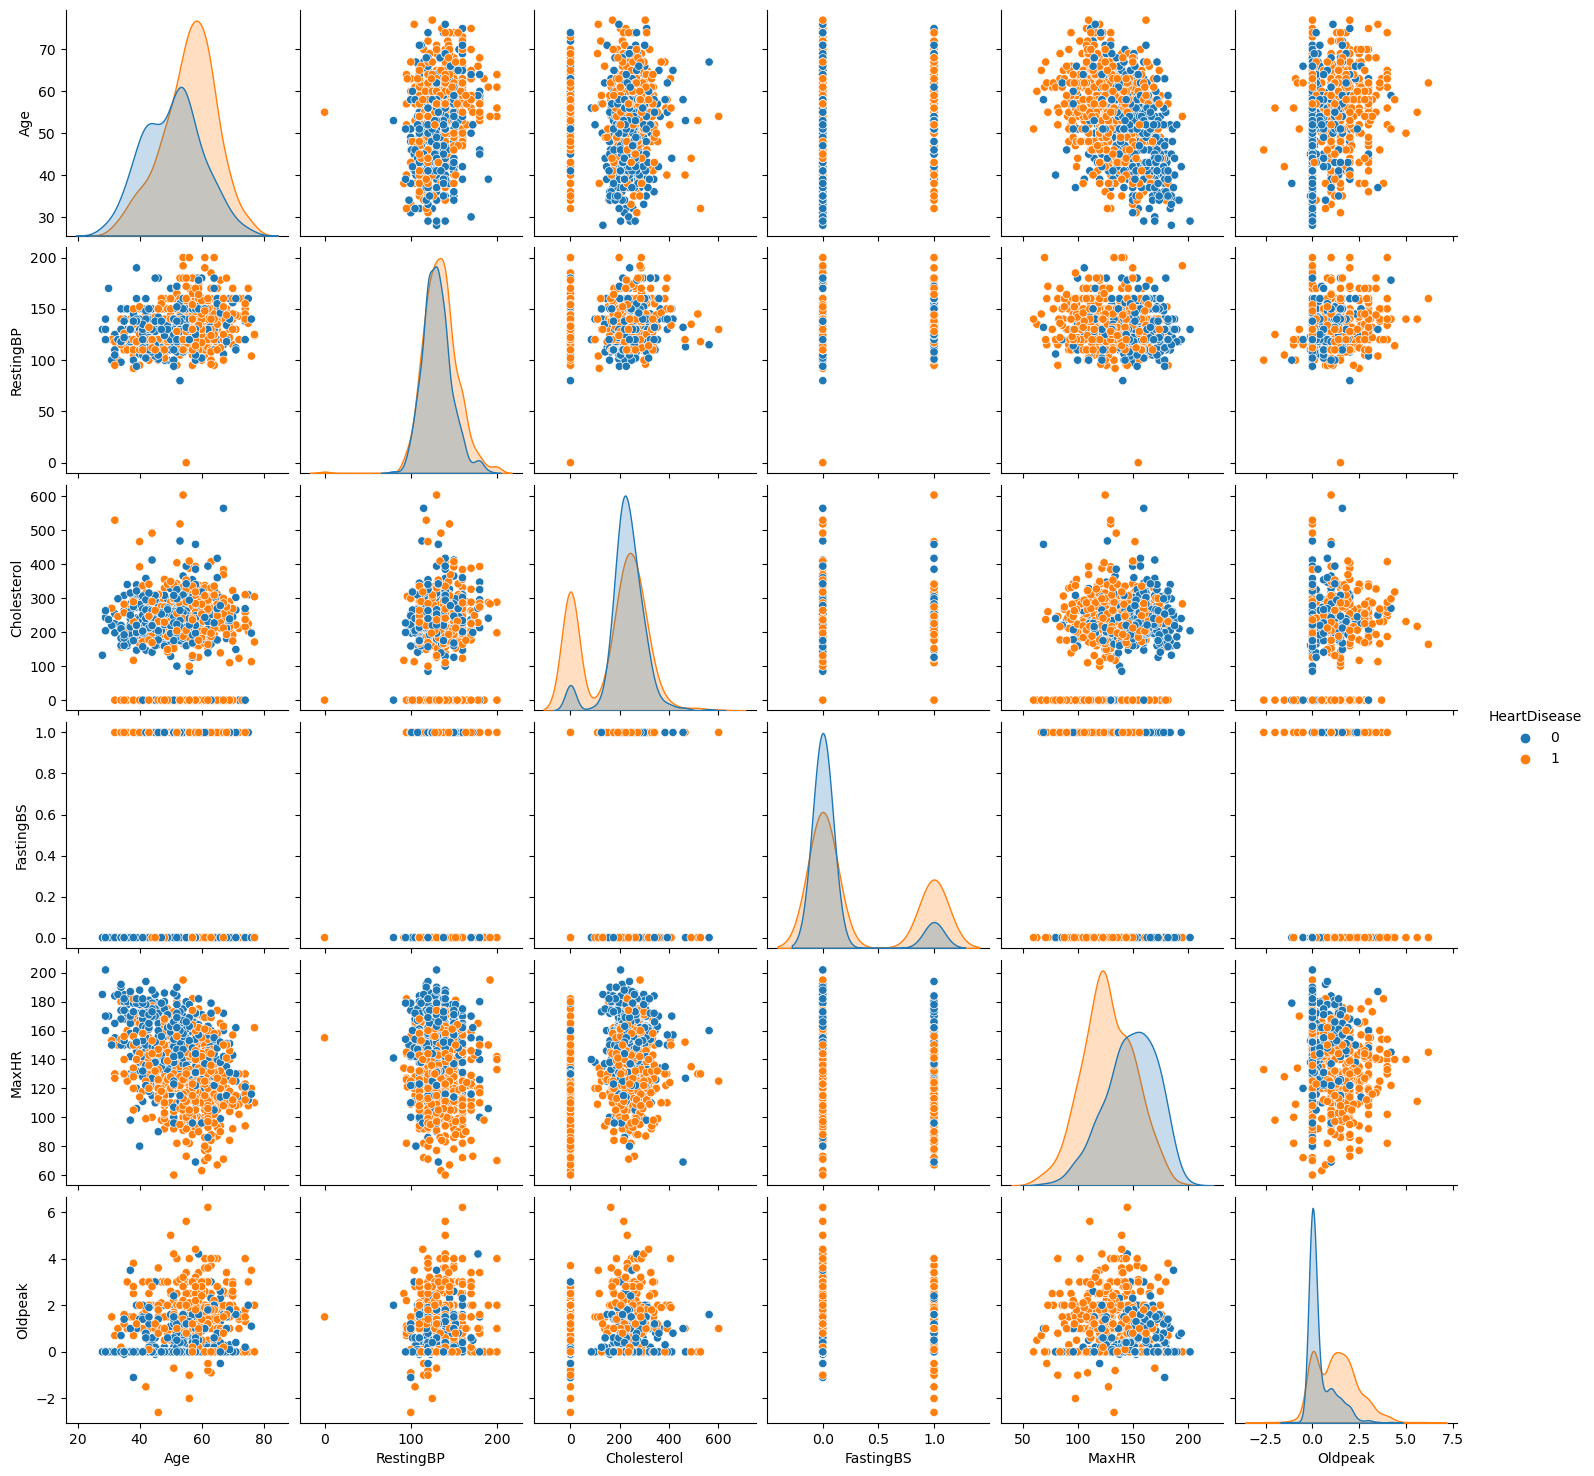

In [100]:
# sns.pairplot(df,hue="HeartDisease")

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_64562/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

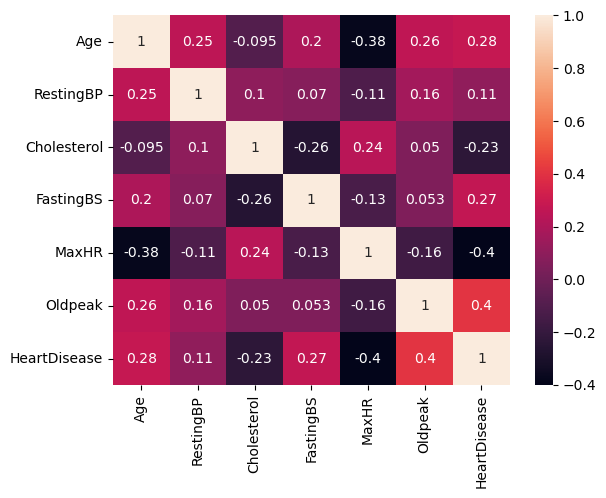

In [48]:
sns.heatmap(df.corr(),annot=True)

In [49]:
categorical_features = ["Sex","ChestPainType", "FastingBS", "RestingECG" ,"ExerciseAngina", "ST_Slope", "HeartDisease"]
numerical_features = ["Age" ,"RestingBP" ,"Cholesterol", "MaxHR" ,"Oldpeak"]

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df1 = df.copy(deep = True)
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_64562/3931527013.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])


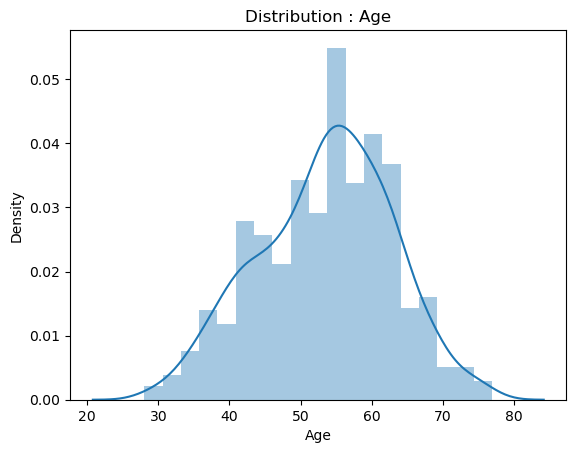

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_64562/3931527013.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])


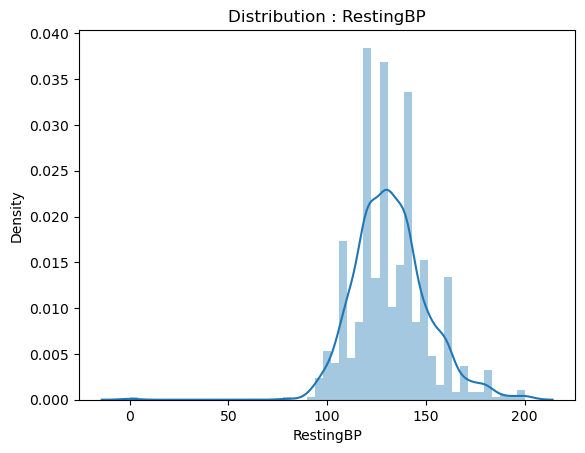

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_64562/3931527013.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])


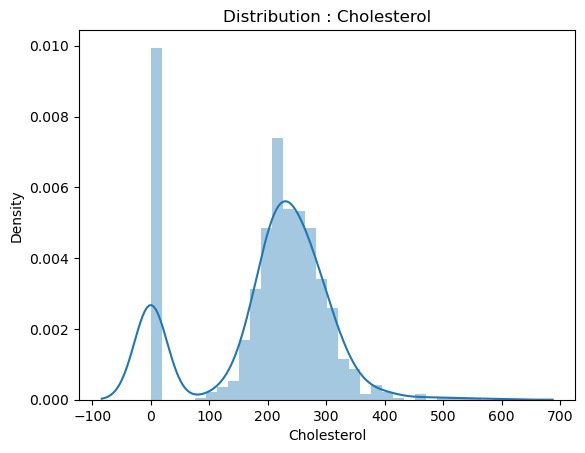

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_64562/3931527013.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])


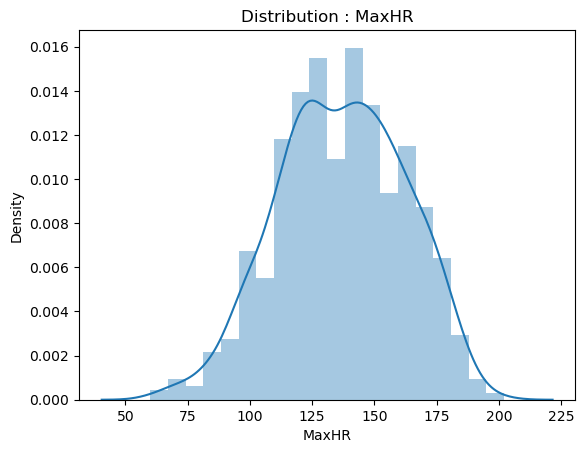

In [51]:
for i in range(len(numerical_features)):
    sns.distplot(df[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
    plt.show()

In [52]:
df = df[df.Cholesterol != 0]

In [ ]:
df = df[df.Cholesterol != 0]

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_64562/3556712391.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])


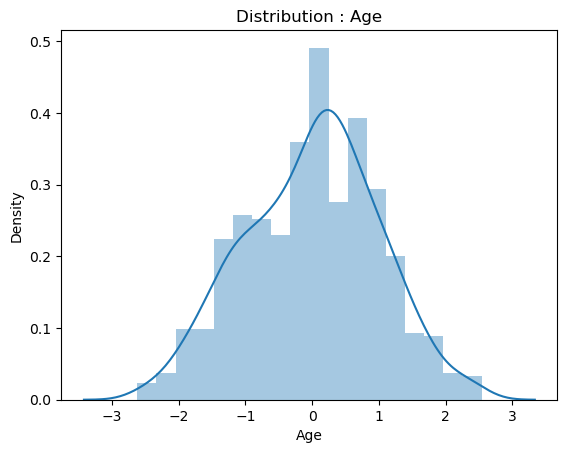

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_64562/3556712391.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])


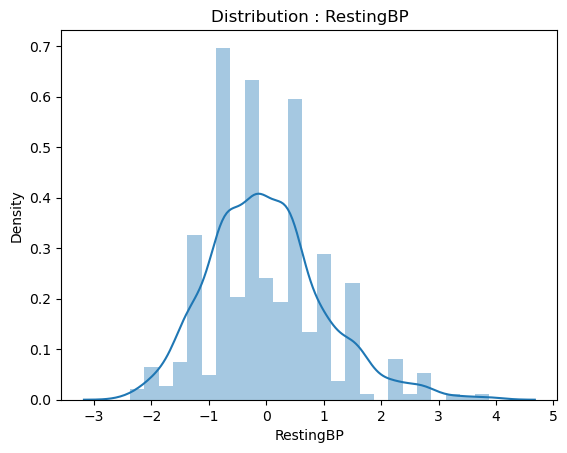

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_64562/3556712391.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])


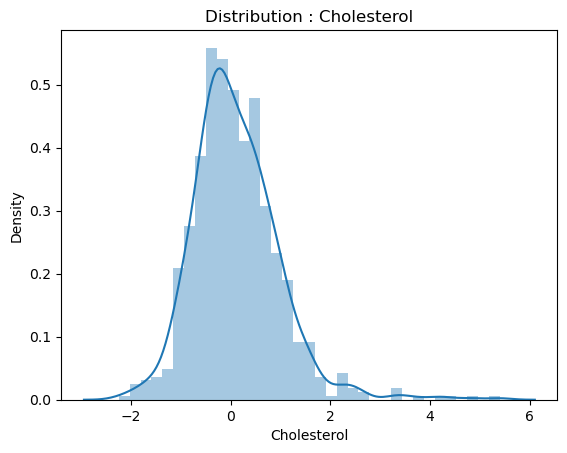

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_64562/3556712391.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])


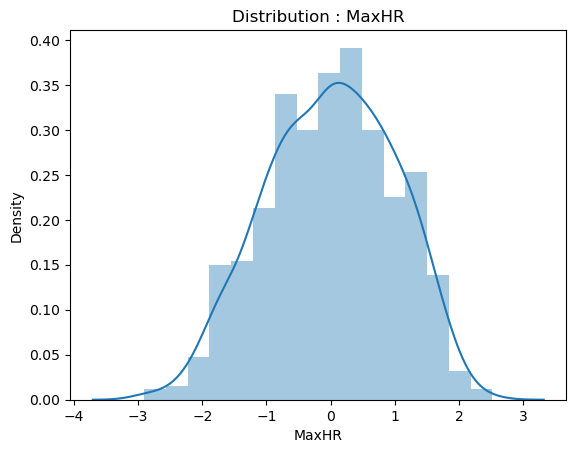

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_64562/3556712391.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])


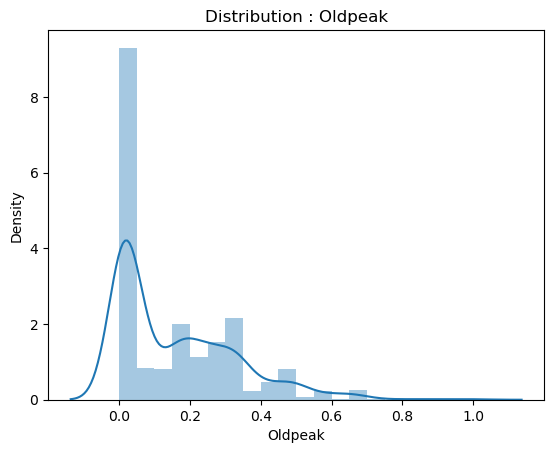

In [59]:
for i in range(len(numerical_features)):
    sns.distplot(df[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
    plt.show()

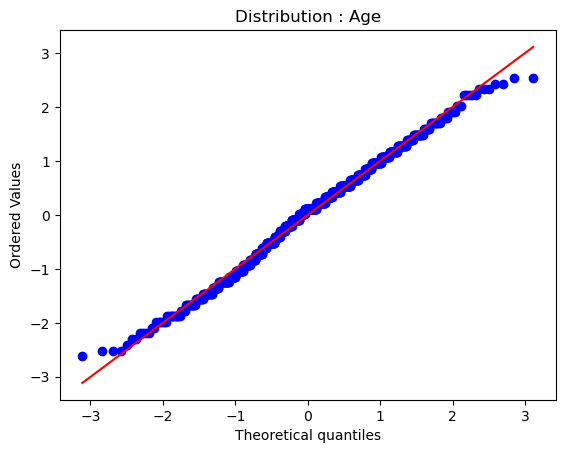

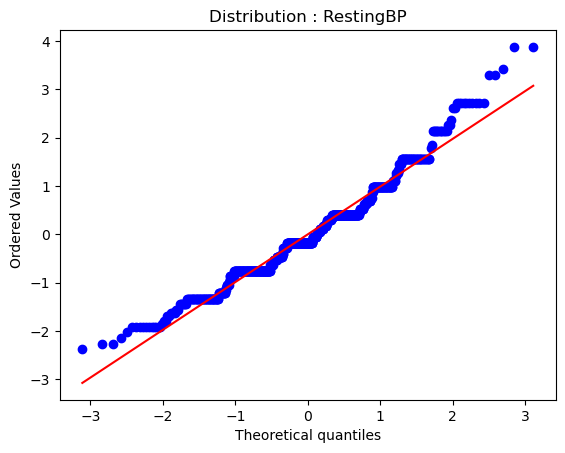

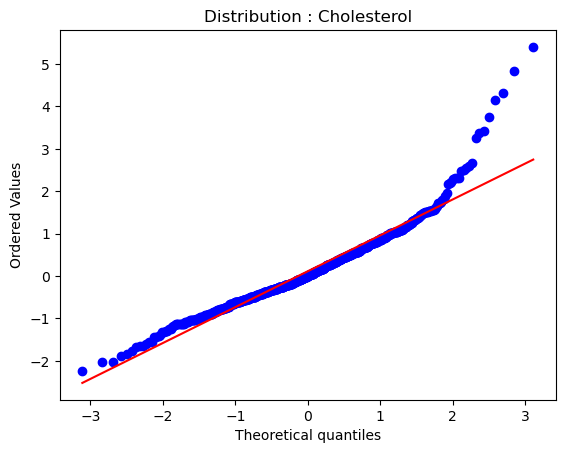

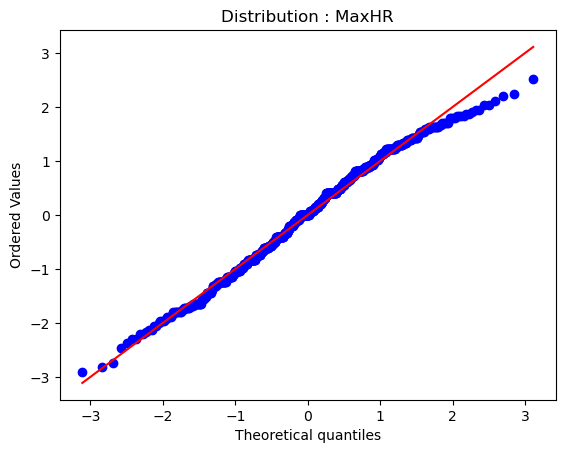

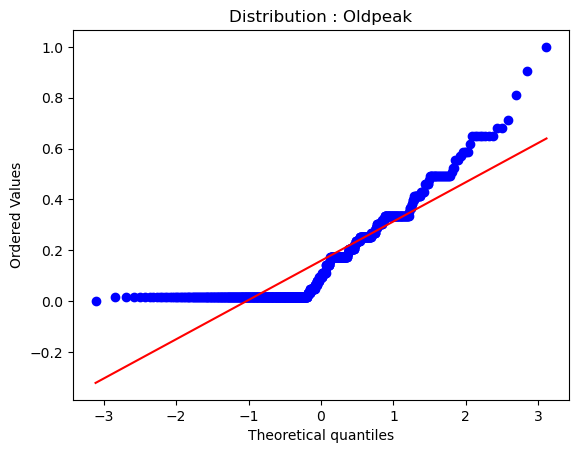

In [58]:
import scipy.stats as stats
for i in range(len(numerical_features)):
    stats.probplot(df[numerical_features[i]],dist="norm", plot=plt)
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
    plt.show()

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
features = df.loc[:,categorical_features[:-1]]
target = df.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 
featureScores.sort_values(by="Chi Squared Score",ascending=False)

,Chi Squared Score
ExerciseAngina,139.775283
ChestPainType,127.478652
ST_Slope,67.425731
FastingBS,16.015879
Sex,15.600925
RestingECG,0.031521


In [61]:
from sklearn.feature_selection import f_classif

features = df.loc[:,numerical_features]
target = df.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores.sort_values(by="ANOVA Score",ascending=False)

,ANOVA Score
Oldpeak,242.364279
MaxHR,123.425078
Age,72.839116
RestingBP,23.020309
Cholesterol,8.113851


In [57]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
rs = RobustScaler()

df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])
df['Age'] = ss.fit_transform(df[['Age']])
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesterol'] = rs.fit_transform(df[['Cholesterol']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.356073,1,1,0.403980,0.767528,0,1,1.296470,0,0.015873,2,0
1,-0.408656,0,2,1.561980,-0.841328,0,1,0.643613,0,0.174603,1,1
2,-1.671879,1,1,-0.175019,0.678967,0,2,-1.722993,0,0.015873,2,0
3,-0.513925,0,0,0.288180,-0.339483,0,1,-1.314958,1,0.253968,1,1
4,0.117686,1,2,0.982980,-0.619926,0,1,-0.743708,0,0.015873,2,0


In [ ]:
# df.drop()

In [62]:
from h2o.automl import H2OAutoML

In [63]:
df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [64]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [65]:
x = df.columns
y = "HeartDisease"
x = x.remove(y)

In [66]:
x

In [67]:
y

'HeartDisease'

In [87]:
aml = H2OAutoML(max_models=100,balance_classes=True, seed=986875,include_algos = ["DRF","GLM","XGBoost"])
aml.train(y=y, training_frame=train,validation_frame = test)

AutoML progress: |
00:14:51.370: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
00:14:51.396: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


00:14:52.570: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
00:14:53.294: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
00:14:53

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_3_20230424_01451_model_102


Model Summary: 
    number_of_trees
--  -----------------
    46

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.060765143356860514
RMSE: 0.2465058688081493
MAE: 0.16943660842383976
RMSLE: 0.1763992232754046
Mean Residual Deviance: 0.060765143356860514

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.14380684255282383
RMSE: 0.37921872653235866
MAE: 0.26863945434170383
RMSLE: 0.2642527353188001
Mean Residual Deviance: 0.14380684255282383

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.09463571310849588
RMSE: 0.3076291811719036
MAE: 0.2133763692201495
RMSLE: 0.21708695280386445
Mean Residual Deviance: 0.09463571310849588

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.213405   0.027374   0.196272      0.255147      0.225919      0.202453      0.187235
mean_residual_deviance  0.0946678  0.0244294  0.0757203     0.12755       0.113191      0.0846477     0.0722302
mse                     0.0946678  0.0244294  0.0757203     0.12755       0.113191      0.0846477     0.0722302
r2                      0.620029   0.099224   0.696583      0.48611       0.545145      0.661312      0.710996
residual_deviance       0.0946678  0.0244294  0.0757203     0.12755       0.113191      0.0846477     0.0722302
rmse                    0.30569    0.0390689  0.275173      0.357141      0.336439      0.290943      0.268757
rmsle                   0.215972   0.0249576  0.194888      0.249988      0.232354      0.211109      0.191521

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-04-24 00:15:32  26.347 sec  0                  0.5              0.5             0.25                 0.5                0.5               0.25
    2023-04-24 00:15:32  26.356 sec  5                  0.346127         0.313992        0.119804             0.382824           0.345748          0.146554
    2023-04-24 00:15:32  26.361 sec  10                 0.304988         0.239388        0.0930175            0.366315           0.28766           0.134187
    2023-04-24 00:15:32  26.368 sec  15                 0.290219         0.203148        0.084227             0.36689            0.264453          0.134608
    2023-04-24 00:15:32  26.376 sec  20                 0.28028          0.193157        0.0785567            0.368898           0.261693          0.136086
    2023-04-24 00:15:32  26.384 sec  25                 0.27223          0.187268        0.0741093            0.372022           0.263428          0.1384
    2023-04-24 00:15:32  26.393 sec  30                 0.265461         0.1824          0.0704696            0.375012           0.265623          0.140634
    2023-04-24 00:15:32  26.403 sec  35                 0.259238         0.17801         0.0672044            0.37638            0.266114          0.141662
    2023-04-24 00:15:32  26.413 sec  40                 0.2527           0.173306        0.0638575            0.377904           0.266972          0.142812
    2023-04-24 00:15:32  26.423 sec  45                 0.247493         0.169897        0.0612528            0.378104           0.267287          0.142963
    2023-04-24 00:15:32  26.430 sec  46                 0.246506         0.169437        0.0607651            0.379219           0.268639          0.143807

Variable Importances: 
variable        relative_importance 

In [88]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_grid_1_AutoML_3_20230424_01451_model_102,0.307629,0.0946357,0.213376,0.217087,0.0946357
XGBoost_grid_1_AutoML_3_20230424_01451_model_116,0.308255,0.0950209,0.208098,0.216991,0.0950209
XGBoost_grid_1_AutoML_3_20230424_01451_model_115,0.310184,0.096214,0.215551,0.219475,0.096214
XGBoost_grid_1_AutoML_3_20230424_01451_model_86,0.31132,0.0969199,0.217081,0.219555,0.0969199
XGBoost_grid_1_AutoML_3_20230424_01451_model_81,0.311962,0.0973201,0.217171,0.220146,0.0973201
XGBoost_grid_1_AutoML_3_20230424_01451_model_93,0.312221,0.0974818,0.214247,0.220948,0.0974818
XGBoost_grid_1_AutoML_3_20230424_01451_model_17,0.313045,0.0979972,0.218207,0.220962,0.0979972
XGBoost_grid_1_AutoML_3_20230424_01451_model_106,0.313077,0.0980175,0.21671,0.220003,0.0980175
XGBoost_grid_1_AutoML_3_20230424_01451_model_98,0.313396,0.0982172,0.217925,0.220531,0.0982172
XGBoost_grid_1_AutoML_3_20230424_01451_model_70,0.3135,0.0982822,0.212073,0.22121,0.0982822


In [89]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_3_20230424_01451_model_102


Model Summary: 
    number_of_trees
--  -----------------
    46

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.060765143356860514
RMSE: 0.2465058688081493
MAE: 0.16943660842383976
RMSLE: 0.1763992232754046
Mean Residual Deviance: 0.060765143356860514

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.14380684255282383
RMSE: 0.37921872653235866
MAE: 0.26863945434170383
RMSLE: 0.2642527353188001
Mean Residual Deviance: 0.14380684255282383

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.09463571310849588
RMSE: 0.3076291811719036
MAE: 0.2133763692201495
RMSLE: 0.21708695280386445
Mean Residual Deviance: 0.09463571310849588

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------- 

In [90]:
aml.leader

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_3_20230424_01451_model_102


Model Summary: 
    number_of_trees
--  -----------------
    46

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.060765143356860514
RMSE: 0.2465058688081493
MAE: 0.16943660842383976
RMSLE: 0.1763992232754046
Mean Residual Deviance: 0.060765143356860514

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.14380684255282383
RMSE: 0.37921872653235866
MAE: 0.26863945434170383
RMSLE: 0.2642527353188001
Mean Residual Deviance: 0.14380684255282383

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.09463571310849588
RMSE: 0.3076291811719036
MAE: 0.2133763692201495
RMSLE: 0.21708695280386445
Mean Residual Deviance: 0.09463571310849588

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.213405   0.027374   0.196272      0.255147      0.225919      0.202453      0.187235
mean_residual_deviance  0.0946678  0.0244294  0.0757203     0.12755       0.113191      0.0846477     0.0722302
mse                     0.0946678  0.0244294  0.0757203     0.12755       0.113191      0.0846477     0.0722302
r2                      0.620029   0.099224   0.696583      0.48611       0.545145      0.661312      0.710996
residual_deviance       0.0946678  0.0244294  0.0757203     0.12755       0.113191      0.0846477     0.0722302
rmse                    0.30569    0.0390689  0.275173      0.357141      0.336439      0.290943      0.268757
rmsle                   0.215972   0.0249576  0.194888      0.249988      0.232354      0.211109      0.191521

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-04-24 00:15:32  26.347 sec  0                  0.5              0.5             0.25                 0.5                0.5               0.25
    2023-04-24 00:15:32  26.356 sec  5                  0.346127         0.313992        0.119804             0.382824           0.345748          0.146554
    2023-04-24 00:15:32  26.361 sec  10                 0.304988         0.239388        0.0930175            0.366315           0.28766           0.134187
    2023-04-24 00:15:32  26.368 sec  15                 0.290219         0.203148        0.084227             0.36689            0.264453          0.134608
    2023-04-24 00:15:32  26.376 sec  20                 0.28028          0.193157        0.0785567            0.368898           0.261693          0.136086
    2023-04-24 00:15:32  26.384 sec  25                 0.27223          0.187268        0.0741093            0.372022           0.263428          0.1384
    2023-04-24 00:15:32  26.393 sec  30                 0.265461         0.1824          0.0704696            0.375012           0.265623          0.140634
    2023-04-24 00:15:32  26.403 sec  35                 0.259238         0.17801         0.0672044            0.37638            0.266114          0.141662
    2023-04-24 00:15:32  26.413 sec  40                 0.2527           0.173306        0.0638575            0.377904           0.266972          0.142812
    2023-04-24 00:15:32  26.423 sec  45                 0.247493         0.169897        0.0612528            0.378104           0.267287          0.142963
    2023-04-24 00:15:32  26.430 sec  46                 0.246506         0.169437        0.0607651            0.379219           0.268639          0.143807

Variable Importances: 
variable        relative_importance 

In [91]:
best_model.model_performance(test)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.14380684255282383
RMSE: 0.37921872653235866
MAE: 0.26863945434170383
RMSLE: 0.2642527353188001
Mean Residual Deviance: 0.14380684255282383

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_3_20230424_01451_model_94,0.36513,0.13332,0.257931,0.254371,0.13332,88,0.071576,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_98,0.368148,0.135533,0.259938,0.255618,0.135533,85,0.014802,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_93,0.368639,0.135895,0.261172,0.255506,0.135895,79,0.007194,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_99,0.369578,0.136588,0.262418,0.256255,0.136588,69,0.004965,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_16,0.369838,0.13678,0.265503,0.256785,0.13678,60,0.006665,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_100,0.370399,0.137195,0.25809,0.259495,0.137195,72,0.004617,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_49,0.370481,0.137256,0.256589,0.258056,0.137256,228,0.005994,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_81,0.371238,0.137818,0.261252,0.258369,0.137818,72,0.00576,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_86,0.371645,0.13812,0.263069,0.257185,0.13812,70,0.005392,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_56,0.371786,0.138225,0.269088,0.258889,0.138225,147,0.005198,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

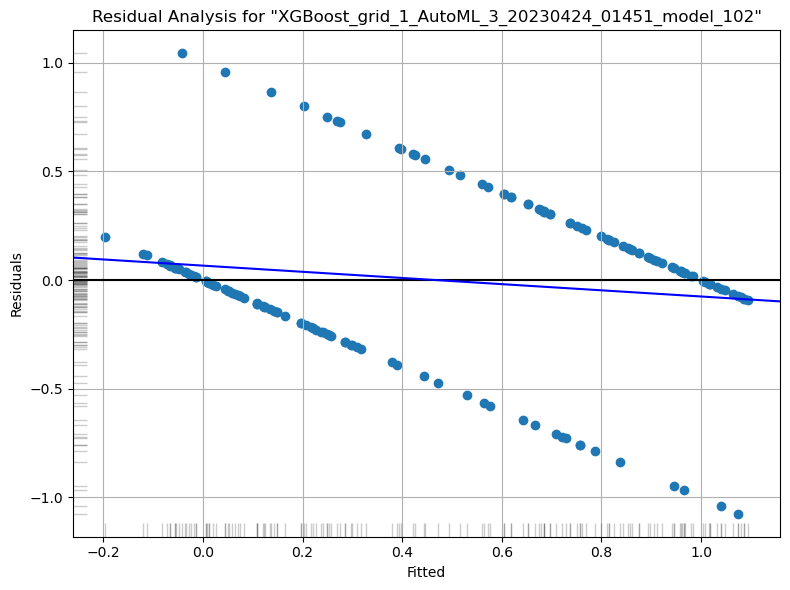

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

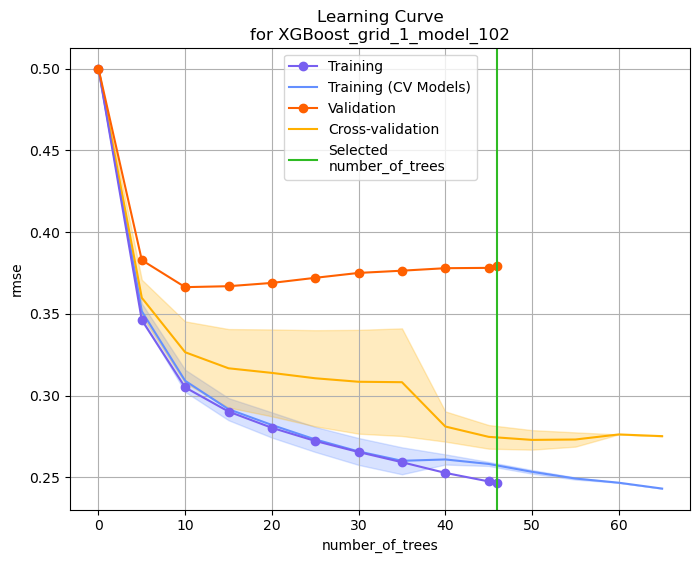

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

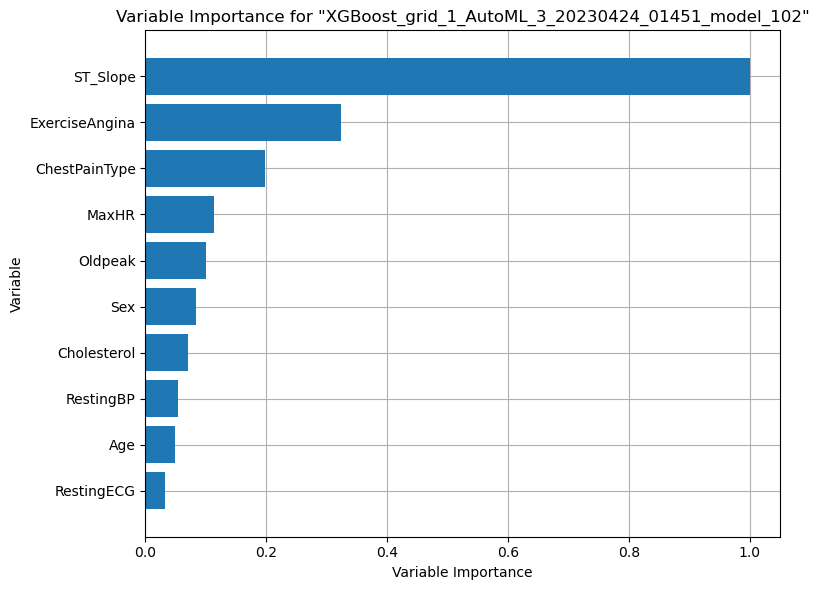

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

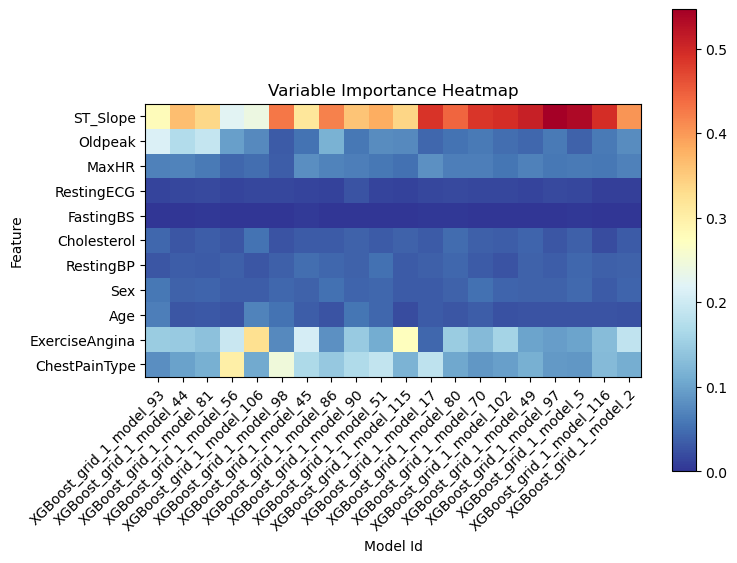

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

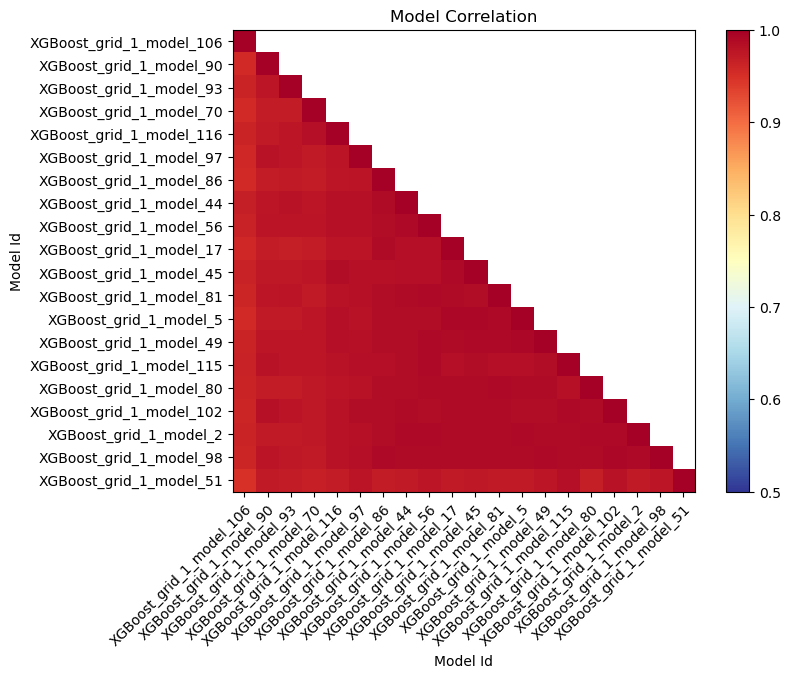

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

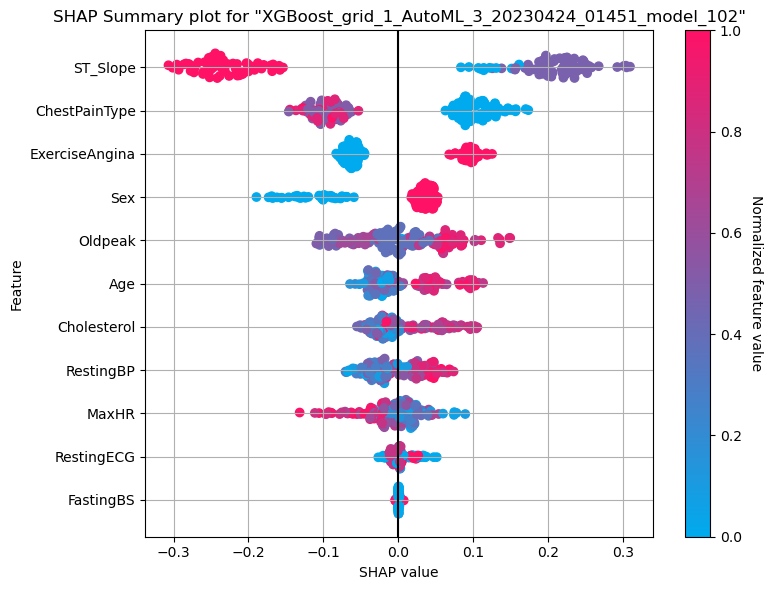

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

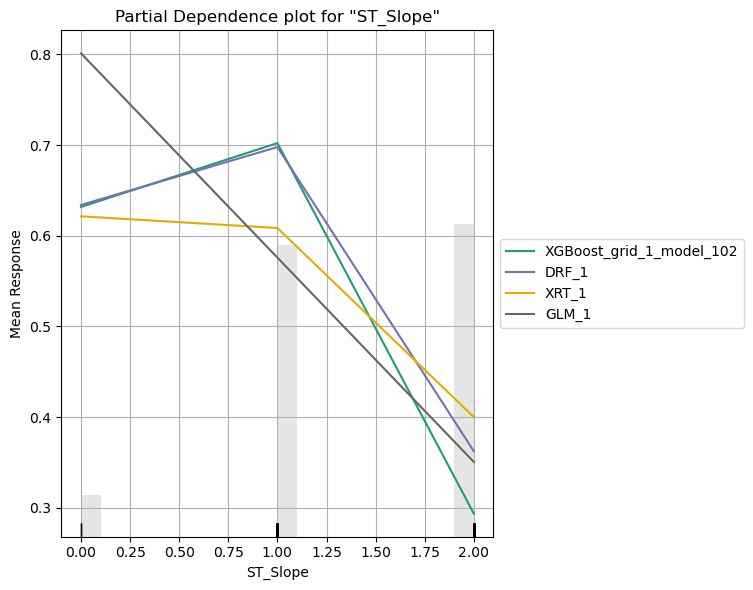

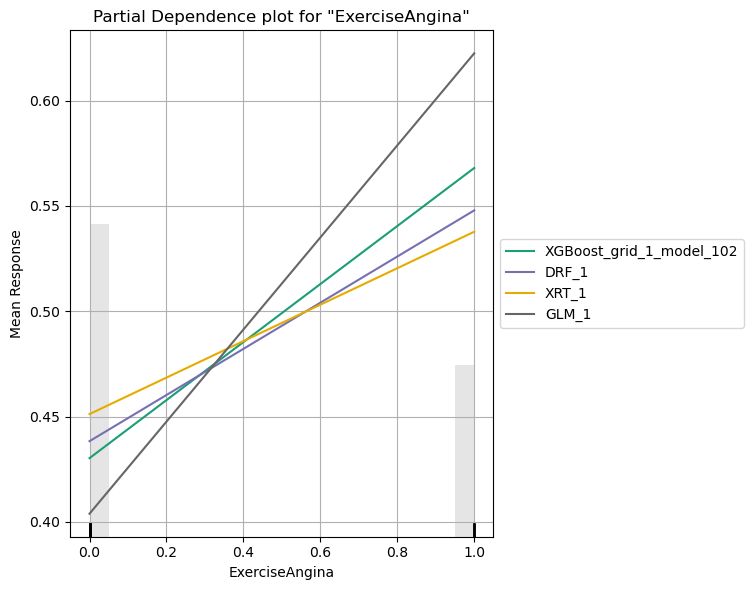

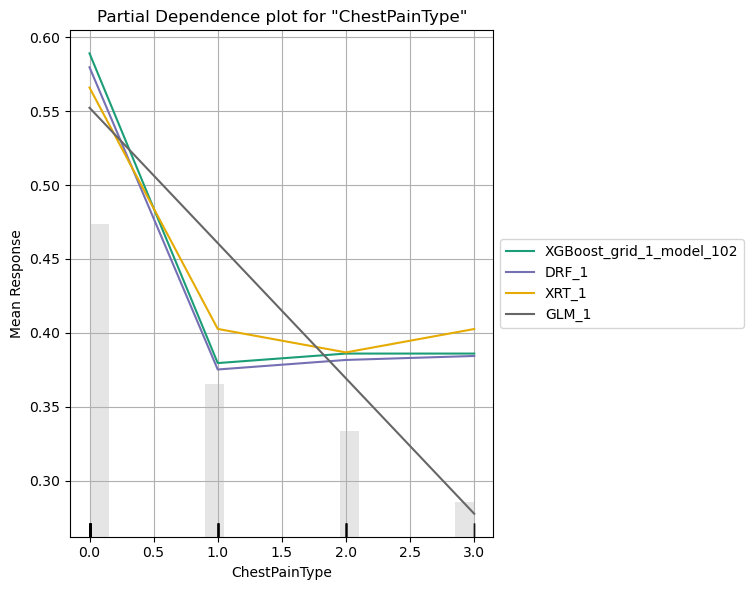

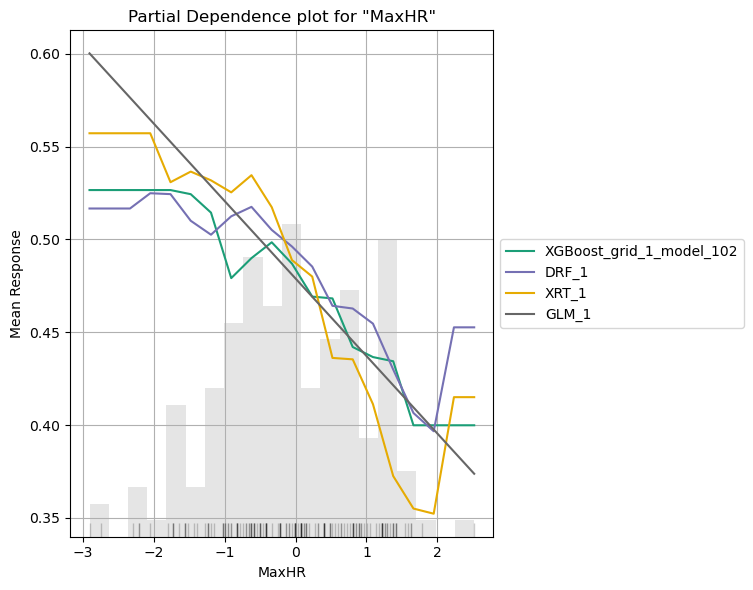

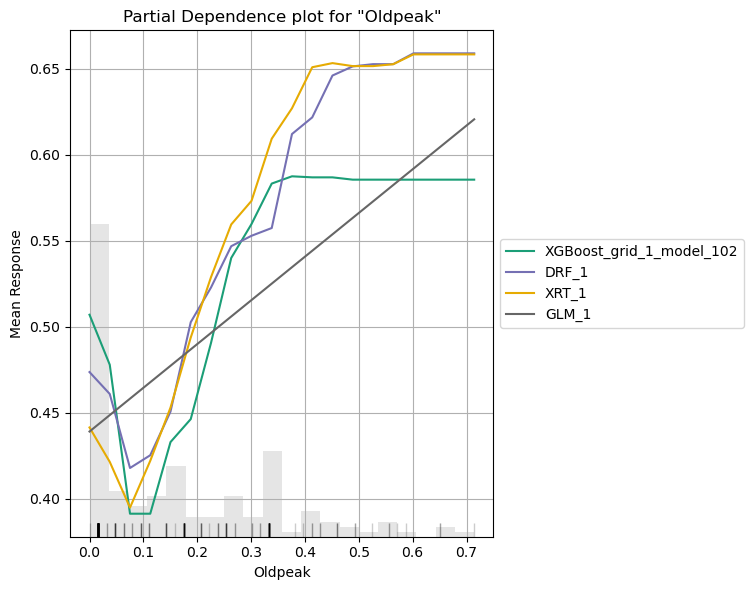

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

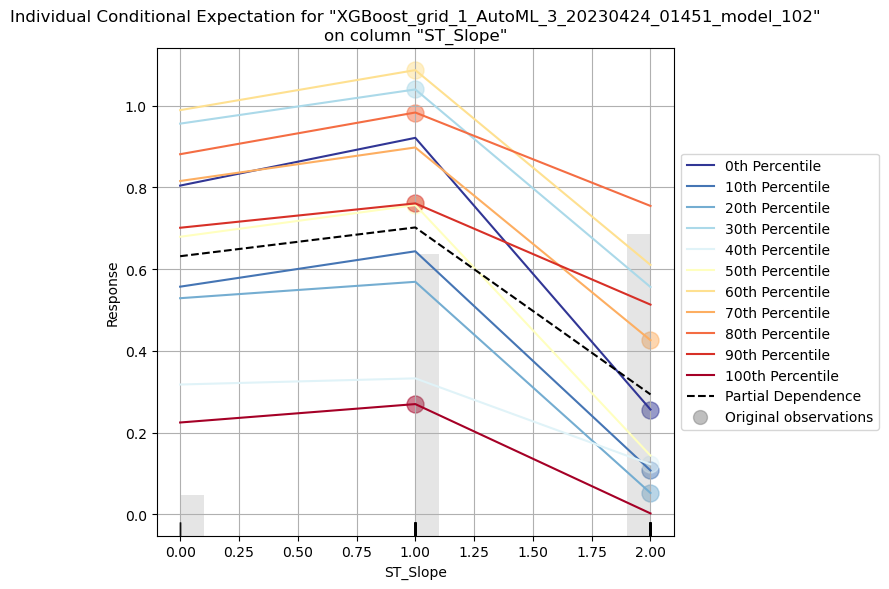

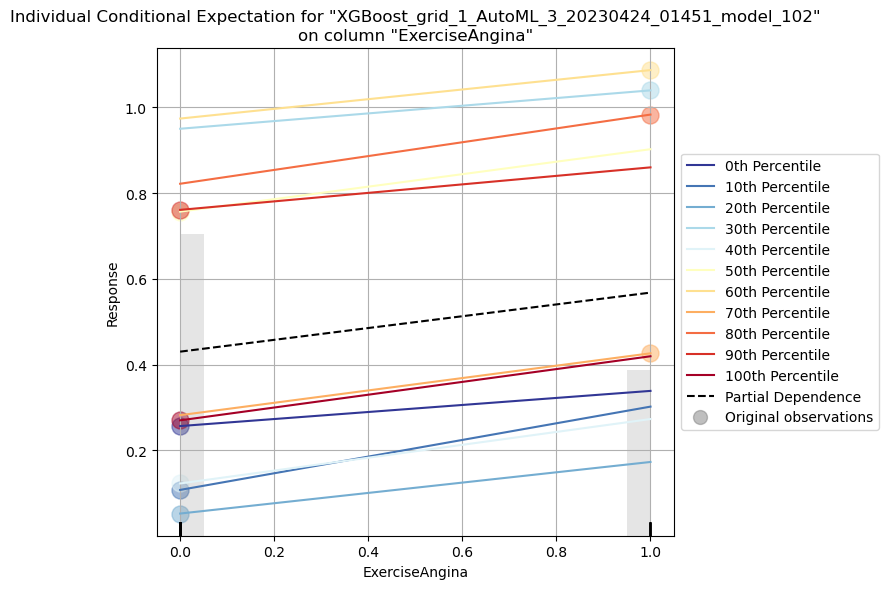

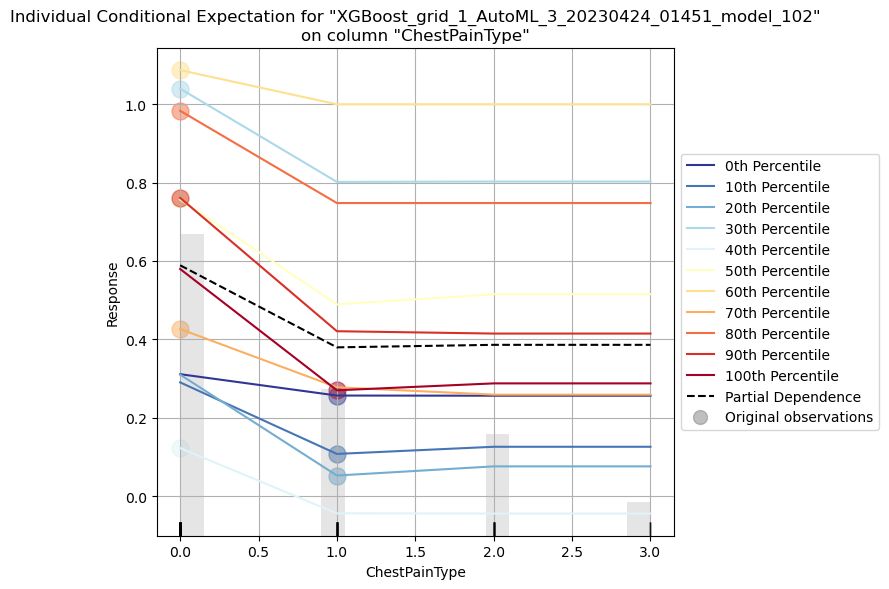

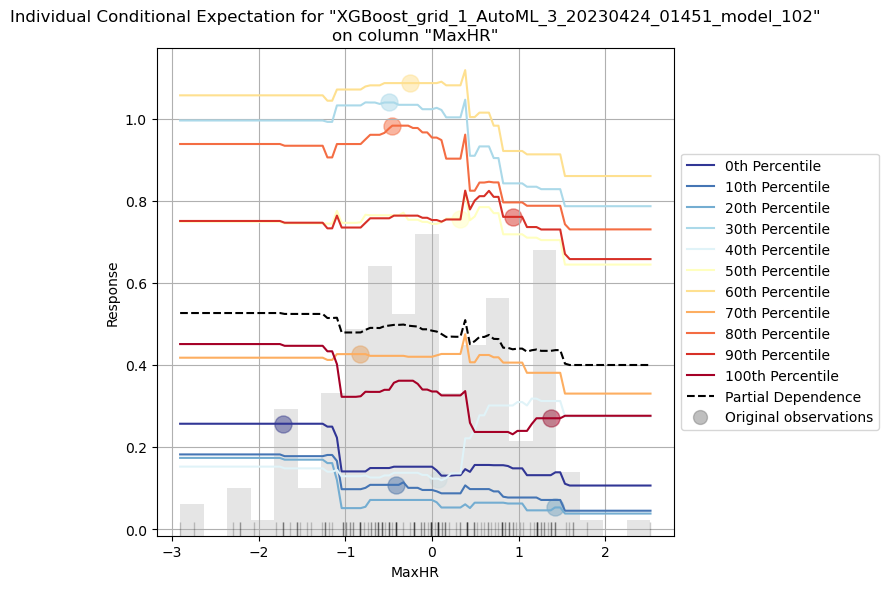

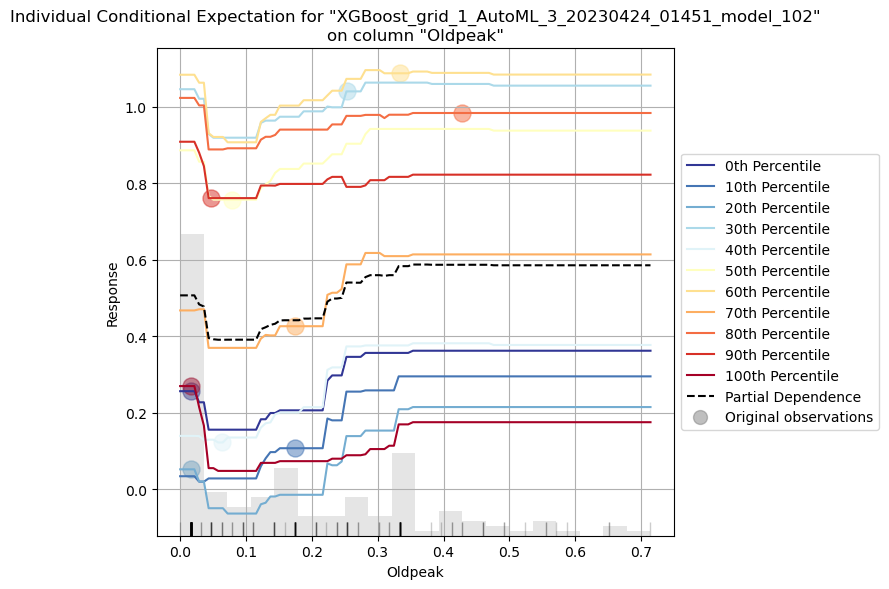

In [92]:
explain_model_test = aml.explain(frame = test, figsize = (8,6))

In [93]:
preds = aml.leader.predict(test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [94]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_3_20230424_01451_model_102,0.307629,0.0946357,0.213376,0.217087,0.0946357,91,0.010479,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_116,0.308255,0.0950209,0.208098,0.216991,0.0950209,64,0.003646,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_115,0.310184,0.096214,0.215551,0.219475,0.096214,152,0.004095,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_86,0.31132,0.0969199,0.217081,0.219555,0.0969199,70,0.003735,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_81,0.311962,0.0973201,0.217171,0.220146,0.0973201,72,0.003998,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_93,0.312221,0.0974818,0.214247,0.220948,0.0974818,79,0.002706,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_17,0.313045,0.0979972,0.218207,0.220962,0.0979972,323,0.00493,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_106,0.313077,0.0980175,0.21671,0.220003,0.0980175,53,0.004106,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_98,0.313396,0.0982172,0.217925,0.220531,0.0982172,85,0.004105,XGBoost
XGBoost_grid_1_AutoML_3_20230424_01451_model_70,0.3135,0.0982822,0.212073,0.22121,0.0982822,65,0.00251,XGBoost


In [95]:
m = aml.get_best_model()
m

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_3_20230424_01451_model_102


Model Summary: 
    number_of_trees
--  -----------------
    46

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.060765143356860514
RMSE: 0.2465058688081493
MAE: 0.16943660842383976
RMSLE: 0.1763992232754046
Mean Residual Deviance: 0.060765143356860514

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.14380684255282383
RMSE: 0.37921872653235866
MAE: 0.26863945434170383
RMSLE: 0.2642527353188001
Mean Residual Deviance: 0.14380684255282383

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.09463571310849588
RMSE: 0.3076291811719036
MAE: 0.2133763692201495
RMSLE: 0.21708695280386445
Mean Residual Deviance: 0.09463571310849588

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.213405   0.027374   0.196272      0.255147      0.225919      0.202453      0.187235
mean_residual_deviance  0.0946678  0.0244294  0.0757203     0.12755       0.113191      0.0846477     0.0722302
mse                     0.0946678  0.0244294  0.0757203     0.12755       0.113191      0.0846477     0.0722302
r2                      0.620029   0.099224   0.696583      0.48611       0.545145      0.661312      0.710996
residual_deviance       0.0946678  0.0244294  0.0757203     0.12755       0.113191      0.0846477     0.0722302
rmse                    0.30569    0.0390689  0.275173      0.357141      0.336439      0.290943      0.268757
rmsle                   0.215972   0.0249576  0.194888      0.249988      0.232354      0.211109      0.191521

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-04-24 00:15:32  26.347 sec  0                  0.5              0.5             0.25                 0.5                0.5               0.25
    2023-04-24 00:15:32  26.356 sec  5                  0.346127         0.313992        0.119804             0.382824           0.345748          0.146554
    2023-04-24 00:15:32  26.361 sec  10                 0.304988         0.239388        0.0930175            0.366315           0.28766           0.134187
    2023-04-24 00:15:32  26.368 sec  15                 0.290219         0.203148        0.084227             0.36689            0.264453          0.134608
    2023-04-24 00:15:32  26.376 sec  20                 0.28028          0.193157        0.0785567            0.368898           0.261693          0.136086
    2023-04-24 00:15:32  26.384 sec  25                 0.27223          0.187268        0.0741093            0.372022           0.263428          0.1384
    2023-04-24 00:15:32  26.393 sec  30                 0.265461         0.1824          0.0704696            0.375012           0.265623          0.140634
    2023-04-24 00:15:32  26.403 sec  35                 0.259238         0.17801         0.0672044            0.37638            0.266114          0.141662
    2023-04-24 00:15:32  26.413 sec  40                 0.2527           0.173306        0.0638575            0.377904           0.266972          0.142812
    2023-04-24 00:15:32  26.423 sec  45                 0.247493         0.169897        0.0612528            0.378104           0.267287          0.142963
    2023-04-24 00:15:32  26.430 sec  46                 0.246506         0.169437        0.0607651            0.379219           0.268639          0.143807

Variable Importances: 
variable        relative_importance 

In [96]:
m.params.keys()

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'distribution', 'tweedie_power', 'categorical_encoding', 'quiet_mode', 'checkpoint', 'export_checkpoints_dir', 'ntrees', 'max_depth', 'min_rows', 'min_child_weight', 'learn_rate', 'eta', 'sample_rate', 'subsample', 'col_sample_rate', 'colsample_bylevel', 'col_sample_rate_per_tree', 'colsample_bytree', 'colsample_bynode', 'max_abs_leafnode_pred', 'max_delta_step', 'monotone_constraints', 'interaction_constraints', 'score_tree_interval', 'min_split_improvement', 'gamma', 'nthread', 'save_matrix_directory', 'build_tree_one_node', 'parallelize_cross_validation', 'calibrate_mod

In [97]:
m.params['model_id']

{'default': None,
 'actual': {'__meta': {'schema_version': 3,
   'schema_name': 'ModelKeyV3',
   'schema_type': 'Key<Model>'},
  'name': 'XGBoost_grid_1_AutoML_3_20230424_01451_model_102',
  'type': 'Key<Model>',
  'URL': '/3/Models/XGBoost_grid_1_AutoML_3_20230424_01451_model_102'},
 'input': None}

In [98]:
info = aml.training_info
info

{'creation_epoch': '1682313291',
 'start_epoch': '1682313291',
 'start_XGBoost_def_2': '1682313291',
 'start_GLM_def_1': '1682313293',
 'start_XGBoost_def_1': '1682313293',
 'start_DRF_def_1': '1682313294',
 'start_XGBoost_def_3': '1682313295',
 'start_DRF_XRT': '1682313295',
 'start_XGBoost_grid_1': '1682313297',
 'start_completion_XGBoost_grid_1': '1682313306',
 'stop_epoch': '1682313337',
 'duration_secs': '46'}

In [99]:
perf = m.model_performance(test)
perf

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.14380684255282383
RMSE: 0.37921872653235866
MAE: 0.26863945434170383
RMSLE: 0.2642527353188001
Mean Residual Deviance: 0.14380684255282383

In [100]:
perf

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.14380684255282383
RMSE: 0.37921872653235866
MAE: 0.26863945434170383
RMSLE: 0.2642527353188001
Mean Residual Deviance: 0.14380684255282383